In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
weather_df = pd.read_csv("hyderabad_weather_data.csv")

weather_df["Date"] = pd.to_datetime(weather_df["Date"])

In [30]:
print("Missing values:\n", weather_df.isnull().sum())

Missing values:
 Date                    0
Min Temperature (°C)    0
Avg Temperature (°C)    0
Max Temperature (°C)    0
Humidity (%)            0
Rainfall (mm)           0
Wind Speed (km/h)       0
Pressure (hPa)          0
dtype: int64


In [8]:
print("\nData Types:\n", weather_df.dtypes)

# Summary statistics
print("\nSummary Statistics:\n", weather_df.describe())


Data Types:
 Date                    datetime64[ns]
Min Temperature (°C)           float64
Avg Temperature (°C)           float64
Max Temperature (°C)           float64
Humidity (%)                   float64
Rainfall (mm)                  float64
Wind Speed (km/h)              float64
Pressure (hPa)                 float64
dtype: object

Summary Statistics:
        Min Temperature (°C)  Avg Temperature (°C)  Max Temperature (°C)  \
count           5479.000000           5479.000000           5479.000000   
mean              24.962827             28.471851             31.965044   
std                6.142164              6.075687              6.133202   
min               10.231668             15.003313             17.267266   
25%               21.228009             25.046976             28.209515   
50%               25.797388             29.337767             32.773509   
75%               29.317224             32.769846             36.291608   
max               37.968612           

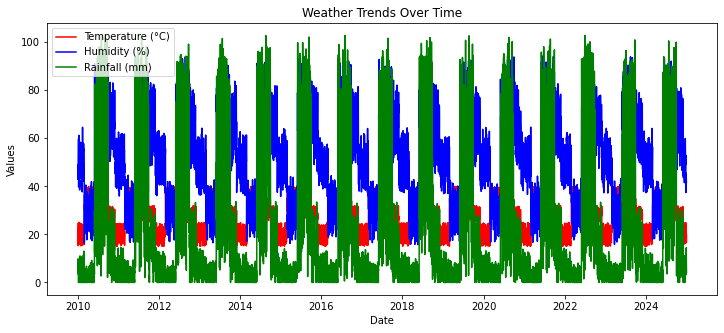

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(weather_df["Date"], weather_df["Avg Temperature (°C)"], label="Temperature (°C)", color="red")
plt.plot(weather_df["Date"], weather_df["Humidity (%)"], label="Humidity (%)", color="blue")
plt.plot(weather_df["Date"], weather_df["Rainfall (mm)"], label="Rainfall (mm)", color="green")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.title("Weather Trends Over Time")
plt.show()

In [11]:
# Check for missing values
print(weather_df.isnull().sum())


Date                    0
Min Temperature (°C)    0
Avg Temperature (°C)    0
Max Temperature (°C)    0
Humidity (%)            0
Rainfall (mm)           0
Wind Speed (km/h)       0
Pressure (hPa)          0
dtype: int64


In [4]:
import numpy as np

# Convert 'Date' column to datetime format
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

# Extract Year, Month, and Day of Year
weather_df['Year'] = weather_df['Date'].dt.year
weather_df['Month'] = weather_df['Date'].dt.month
weather_df['DayOfYear'] = weather_df['Date'].dt.dayofyear

# Apply Cyclical Encoding for seasonality (sin/cos transformation)
weather_df['Month_sin'] = np.sin(2 * np.pi * weather_df['Month'] / 12)
weather_df['Month_cos'] = np.cos(2 * np.pi * weather_df['Month'] / 12)
weather_df['DayOfYear_sin'] = np.sin(2 * np.pi * weather_df['DayOfYear'] / 365)
weather_df['DayOfYear_cos'] = np.cos(2 * np.pi * weather_df['DayOfYear'] / 365)


In [5]:
# Define input features (X) and target variables (y)
X = weather_df.drop(columns=['Date', 'Avg Temperature (°C)', 'Humidity (%)', 'Rainfall (mm)'])  
y = weather_df[['Avg Temperature (°C)', 'Humidity (%)', 'Rainfall (mm)']]


In [6]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4383, 11)
X_test shape: (1096, 11)
y_train shape: (4383, 3)
y_test shape: (1096, 3)


In [7]:
X_train.to_csv("X_train.csv", index=False)


In [8]:
from xgboost import XGBRegressor

# Initialize XGBoost model
weather_model = XGBRegressor(n_estimators=300, learning_rate=0.03, max_depth=3, subsample=0.6, colsample_bytree=1.0, random_state=42)

# Train the model
weather_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = weather_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")


MAE: 5.8238, MSE: 112.6099, RMSE: 10.6118, R² Score: 0.8170


In [10]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid for fine-tuning
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.03, 0.05, 0.07],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform Randomized Search CV to find the best hyperparameters
xgb_regressor_tuned = RandomizedSearchCV(
    xgb_regressor, param_distributions=param_grid, n_iter=20, 
    scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42, n_jobs=-1
)

xgb_regressor_tuned.fit(X_train, y_train)

# Best parameters
print("Best parameters:", xgb_regressor_tuned.best_params_)

# Train the model using best parameters
best_model = xgb.XGBRegressor(**xgb_regressor_tuned.best_params_)
best_model.fit(X_train, y_train)

# Predictions
y_pred_tuned = best_model.predict(X_test)

# Evaluate model again
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"MAE: {mae_tuned:.4f}, MSE: {mse_tuned:.4f}, RMSE: {rmse_tuned:.4f}, R² Score: {r2_tuned:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
87 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ragha\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "C:\Users\ragha\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py", line 1143, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "C:\Users\ragha\AppData\Roaming\P

Best parameters: {'subsample': 0.6, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
MAE: 5.8378, MSE: 112.3578, RMSE: 10.5999, R² Score: 0.8170


In [11]:
import joblib

joblib.dump(best_model, "crop_recommendation_model.pkl")


['crop_recommendation_model.pkl']

In [12]:
# Ensure X_train exists
if 'X_train' not in locals():
    raise ValueError("X_train is not defined. Make sure you have loaded it before this step.")

# Initialize last_known_features with the last row of X_train
last_known_features = np.array([X_train.iloc[-1].values])  # Convert last row to numpy array

future_predictions = []

for _ in range(300):
    # Ensure correct shape
    last_known_features = last_known_features[:, :11]

    # Convert to DataFrame using X_train column names
    last_known_features_df = pd.DataFrame(last_known_features, columns=X_train.columns)

    # Convert to numeric (fix dtype issue)
    last_known_features_df = last_known_features_df.astype(float)

    print("Shape of last_known_features:", last_known_features_df.shape)  # Debugging
    print("Columns of last_known_features:", last_known_features_df.columns)

    # Predict next day's values
    predicted_values = best_model.predict(last_known_features_df)
    future_predictions.append(predicted_values.flatten())

    # Update last_known_features for the next day's prediction
    last_known_features[0, -3:] = predicted_values.flatten()  # ✅ Assign to last 3 columns

    # Shift non-target columns (only if needed)
    last_known_features = np.roll(last_known_features, -1)

# Convert predictions to DataFrame
future_weather_df = pd.DataFrame(
    future_predictions, 
    columns=["Avg Temperature (°C)", "Humidity (%)", "Rainfall (mm)"]
)

# Add dates to match the original dataset format
future_weather_df["Date"] = pd.date_range(start="2025-04-04", periods=300, freq="D")

# Reorder columns
future_weather_df = future_weather_df[["Date", "Avg Temperature (°C)", "Humidity (%)", "Rainfall (mm)"]]

print("✅ Future Weather Predictions Done!")
print(future_weather_df.head())


Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'W

Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'W

Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'W

Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'W

Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'W

Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'W

Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'W

Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'W

Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'W

Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'Wind Speed (km/h)',
       'Pressure (hPa)', 'Year', 'Month', 'DayOfYear', 'Month_sin',
       'Month_cos', 'DayOfYear_sin', 'DayOfYear_cos'],
      dtype='object')
Shape of last_known_features: (1, 11)
Columns of last_known_features: Index(['Min Temperature (°C)', 'Max Temperature (°C)', 'W

In [13]:
# Import necessary libraries
import pandas as pd

# Assuming 'future_weather_df' contains the 300 days of predicted weather data
# Ensure this DataFrame is stored properly
future_weather_df = future_weather_df.reset_index(drop=True)  # Reset index for clean access

# Display the first few rows
print("✅ Future Weather Data Loaded!")
print(future_weather_df.head())


✅ Future Weather Data Loaded!
        Date  Avg Temperature (°C)  Humidity (%)  Rainfall (mm)
0 2025-04-04             37.321098     30.976389       3.862119
1 2025-04-05             27.614620     44.090904      18.153759
2 2025-04-06             27.099384     43.518929       7.840261
3 2025-04-07             38.394203     44.266823      14.606019
4 2025-04-08             27.589777     43.893440      18.579828


In [14]:
# Load the Crop Dataset
crop_df = pd.read_csv("Crop ds.csv")

# Extract unique soil types (handling multiple values in a single entry)
soil_types = set()
for soil in crop_df["Soil Type"].dropna():  # Drop NaN values if any
    soil_types.update(map(str.strip, soil.split(',')))  # Split by ',' and strip spaces

# Convert to sorted list
unique_soil_types = sorted(soil_types)

# Display available soil types
print("Available Soil Types:", unique_soil_types)


Available Soil Types: ['Alluvial Soil', 'Black Soil', 'Clayey', 'Loamy', 'Sandy']


In [15]:
# Display available soil types
print("Available Soil Types:", unique_soil_types)

# Ask user to input soil type
while True:
    user_soil_type = input("\nEnter your soil type from the above options: ").strip()

    # Check if input is valid
    if user_soil_type in unique_soil_types:
        break  # Valid input, exit loop
    else:
        print("Invalid input! Please choose a soil type from the given list.")

print(f"Selected Soil Type: {user_soil_type}")


Available Soil Types: ['Alluvial Soil', 'Black Soil', 'Clayey', 'Loamy', 'Sandy']

Enter your soil type from the above options: Loamy
Selected Soil Type: Loamy


In [16]:
# Filter crop dataset based on user's selected soil type (allowing partial matches)
filtered_crops = crop_df[crop_df['Soil Type'].str.contains(user_soil_type, case=False, na=False)]

# Check if any crops are available for the given soil type
if filtered_crops.empty:
    print(f"\nNo crops found for soil type: {user_soil_type}. Please try another type.")
else:
    print(f"\nCrops that grow in {user_soil_type}:")
    print(filtered_crops[['Crop', 'Avg Temperature (°C)', 'Avg Humidity (%)', 'Avg Rainfall (mm)', 'Growth Duration (days)', 'Yield (kg/ha)']])



Crops that grow in Loamy:
       Crop  Avg Temperature (°C)  Avg Humidity (%)  Avg Rainfall (mm)  \
0      Rice                  27.5                80                850   
1     Wheat                  23.0                70                600   
2     Maize                  26.0                75                750   
6   Soybean                  27.0                72                550   
7  Chickpea                  24.5                68                450   

   Growth Duration (days)  Yield (kg/ha)  
0                     120           5000  
1                     150           4000  
2                     110           4500  
6                     100           3200  
7                      90           2800  


In [17]:
# Define weight factors for each criterion (adjustable)
w_temp = 0.4    # Weight for temperature suitability
w_humidity = 0.3  # Weight for humidity suitability
w_rainfall = 0.2  # Weight for rainfall suitability
w_yield = 0.1  # Weight for yield contribution

# Define maximum possible differences (adjust as needed)
max_temp_diff = 30  # Assume max possible temp difference (30°C)
max_humidity_diff = 50  # Assume max possible humidity difference (50%)
max_rainfall_diff = 500  # Assume max possible rainfall difference (500 mm)

# List to store crop suitability scores
crop_scores = []

# Iterate over each crop in the filtered list
for index, crop in filtered_crops.iterrows():
    crop_name = crop['Crop']
    growth_days = crop['Growth Duration (days)']

    # Get the weather data for the required number of growth days
    relevant_weather = future_weather_df.iloc[:growth_days]  

    # Calculate weather condition differences
    temp_diff = abs(relevant_weather["Avg Temperature (°C)"].mean() - crop["Avg Temperature (°C)"])
    humidity_diff = abs(relevant_weather["Humidity (%)"].mean() - crop["Avg Humidity (%)"])
    rainfall_diff = abs(relevant_weather["Rainfall (mm)"].mean() - crop["Avg Rainfall (mm)"])

    # Normalize differences (convert to 0-100 suitability scores)
    temp_score = max(0, (1 - temp_diff / max_temp_diff) * 100)
    humidity_score = max(0, (1 - humidity_diff / max_humidity_diff) * 100)
    rainfall_score = max(0, (1 - rainfall_diff / max_rainfall_diff) * 100)

    # Normalize yield to a scale of 0-100
    max_yield = filtered_crops["Yield (kg/ha)"].max()
    min_yield = filtered_crops["Yield (kg/ha)"].min()
    yield_score = (crop["Yield (kg/ha)"] - min_yield) / (max_yield - min_yield) * 100

    # Suitability score calculation
    score = (
        w_temp * temp_score +
        w_humidity * humidity_score +
        w_rainfall * rainfall_score +
        w_yield * yield_score
    )

    # Store the crop and its calculated score
    crop_scores.append((crop_name, score))

# Convert scores to DataFrame
crop_scores_df = pd.DataFrame(crop_scores, columns=["Crop", "Suitability Score"])

# Sort by highest score
crop_scores_df = crop_scores_df.sort_values(by="Suitability Score", ascending=False)

# Display top 3 crops
top_3_crops = crop_scores_df.head(3)
print("\n🌾 **Top 3 Recommended Crops** 🌾")
print(top_3_crops)



🌾 **Top 3 Recommended Crops** 🌾
      Crop  Suitability Score
0     Rice          59.345733
2    Maize          58.007262
3  Soybean          55.152614


In [19]:
# Make a copy of the DataFrame to avoid modifying a slice
top_3_crops = crop_scores_df.head(3).copy()

# Modify the column safely
top_3_crops["Suitability Score"] = top_3_crops["Suitability Score"].round(2).astype(str) + "%"

print("\n🌾 **Top 3 Recommended Crops** 🌾")
print(top_3_crops)



🌾 **Top 3 Recommended Crops** 🌾
      Crop Suitability Score
0     Rice            100.0%
2    Maize            97.74%
3  Soybean            92.93%
